In [18]:
import pandas as pd

data = pd.read_csv("owid-covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020/2/24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020/2/25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020/2/26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020/2/27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020/2/28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248628,ZWE,Africa,Zimbabwe,2023/1/4,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
248629,ZWE,Africa,Zimbabwe,2023/1/5,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
248630,ZWE,Africa,Zimbabwe,2023/1/6,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
248631,ZWE,Africa,Zimbabwe,2023/1/7,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [19]:
date = set(data["date"])

In [20]:
import numpy as np

data_clean = pd.DataFrame(date, columns=["date"])
data_clean["dat"] = data_clean["date"].copy()
pd.to_datetime(data_clean["date"])
data_clean["date"] = data_clean["date"].astype(np.datetime64)
data_clean = data_clean.set_index("date").sort_index(ascending=True)
data_clean["new cases"] = data_clean["dat"].map(lambda x : (sum(list(data.loc[data["date"] == x]["new_cases"].dropna()))))
data_clean

,dat,new cases
date,,
2020-01-01,2020/1/1,0.0
2020-01-02,2020/1/2,0.0
2020-01-03,2020/1/3,0.0
2020-01-04,2020/1/4,0.0
2020-01-05,2020/1/5,0.0
...,...,...
2023-01-05,2023/1/5,3025789.0
2023-01-06,2023/1/6,3044405.0
2023-01-07,2023/1/7,1437552.0


In [21]:
# data_clean["dat"].map(lambda x : str(x).replace("/","-"))

data_clean

,dat,new cases
date,,
2020-01-01,2020/1/1,0.0
2020-01-02,2020/1/2,0.0
2020-01-03,2020/1/3,0.0
2020-01-04,2020/1/4,0.0
2020-01-05,2020/1/5,0.0
...,...,...
2023-01-05,2023/1/5,3025789.0
2023-01-06,2023/1/6,3044405.0
2023-01-07,2023/1/7,1437552.0


In [22]:
data_clean["1st div"] = data_clean["new cases"].rolling(window=15).mean()
data_clean = data_clean.dropna()

Text(0.5, 1.0, 'Covid-19 daily new cases')

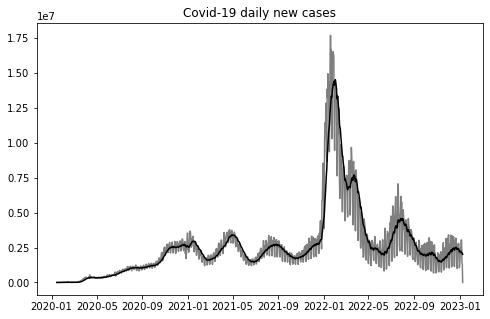

In [28]:
from matplotlib import pyplot as plt
from matplotlib import dates

plt.figure(figsize=(8,5))
plt.plot(data_clean.index,data_clean["new cases"],alpha=0.5,color="black")
plt.plot(data_clean.index,data_clean["1st div"],color="black")
plt.title("Covid-19 daily new cases")

In [29]:
import pandas as pd
import numpy as np
datalist = pd.read_csv("datalist.csv")
datalist["time"] = datalist["time"].astype(np.datetime64)
datalist = datalist.set_index("time")

In [77]:
utr = list(set(datalist.keys().astype(int)) & set(range(0,266)))
orf1ab = list(set(datalist.keys().astype(int)) & set(range(266,21554)))
sp = list(set(datalist.keys().astype(int)) & set(range(21563,25381)))
orf3a = list(set(datalist.keys().astype(int)) & set(range(25393,26220)))
lat = list(set(datalist.keys().astype(int)) & set(range(26472,30000)))

In [92]:
def getRate(rag):
    rag = [str(i) for i in rag]
    return datalist[rag].mean(axis=1)

datalistimp = pd.DataFrame()
datalistimp["utr"] = getRate(utr)
datalistimp["orf1ab"] = getRate(orf1ab)
datalistimp["sp"] = getRate(sp)
datalistimp["orf3a"] = getRate(orf3a)
datalistimp["lat"] = getRate(lat)
datalistimp

,utr,orf1ab,sp,orf3a,lat
time,,,,,
2019-12-01,0.0,0.0,0.000000,0.0,0.000000
2019-12-02,0.0,0.0,0.000000,0.0,0.000000
2019-12-03,0.0,0.0,0.000000,0.0,0.000000
2019-12-04,0.0,0.0,0.000000,0.0,0.000000
2019-12-05,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...
2023-01-09,4412.5,953.0,2620.533333,1158.0,1963.419355
2023-01-10,4412.5,953.0,2620.533333,1158.0,1963.419355
2023-01-11,4412.5,953.0,2620.533333,1158.0,1963.419355


In [89]:
datalistimp

,utr,orf1ab,sp,orf3a,ep,lat
time,,,,,,
2019-12-01,0.0,0.0,0.000000,0.0,NaN,0.000000
2019-12-02,0.0,0.0,0.000000,0.0,NaN,0.000000
2019-12-03,0.0,0.0,0.000000,0.0,NaN,0.000000
2019-12-04,0.0,0.0,0.000000,0.0,NaN,0.000000
2019-12-05,0.0,0.0,0.000000,0.0,NaN,0.000000
...,...,...,...,...,...,...
2023-01-09,4412.5,953.0,2620.533333,1158.0,NaN,1963.419355
2023-01-10,4412.5,953.0,2620.533333,1158.0,NaN,1963.419355
2023-01-11,4412.5,953.0,2620.533333,1158.0,NaN,1963.419355


<Figure size 576x360 with 0 Axes>

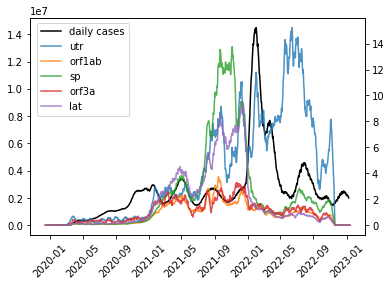

In [132]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)

ax1.plot(data_clean.index,data_clean["1st div"],color="black",label="daily cases")

ax2 = ax1.twinx()
ax2.plot(datalistimp["utr"].diff().rolling(window=15).mean(),label="utr",alpha=0.8)
ax2.plot(datalistimp["orf1ab"].diff().rolling(window=15).mean(),label="orf1ab",alpha=0.8)
ax2.plot(datalistimp["sp"].diff().rolling(window=15).mean(),label="sp",alpha=0.8)
ax2.plot(datalistimp["orf3a"].diff().rolling(window=15).mean(),label="orf3a",alpha=0.8)
ax2.plot(datalistimp["lat"].diff().rolling(window=15).mean(),label="lat",alpha=0.8)

fig.legend(loc = "upper right", bbox_to_anchor=(0.31, 1), bbox_transform=ax1.transAxes)
plt.savefig("fig.png", dpi=200)
plt.show()
